# Proyek Akhir Analisis Data : Bike Sharing

* Nama : Addien Munadiya Yunadi
* Cohort ID : MC299D5Y1926
* Email : mc299d5y1926@student.devacademy.id

## Menentukan Pertanyaan Bisnis 

* Pertanyaan 1 : Bagaimana tren peminjaman sepeda di tahun 2011 hingga 2012 ? Mana yang lebih banyak ?
* Pertanyaan 2 : Musim,cuaca dan waktu seperti apa terjadi pada saat total peminjaman sepeda mencapai puncaknya dalam dua tahun tersebut?

## Import Packages dan Library yang Digunakan

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Di tahap ini kita mengimpor **Bike Sharing Dataset** yang telah diekstrak.File terdiri dari **day.csv** dan **hr.csv**

* **Load Data Day.csv**

In [6]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


* **Load Data Hr.csv**

In [8]:
hr_df = pd.read_csv("data/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data 

Di tahap kedua ini dataframe yang telah tersedia dilakukan penilaian dataset untuk digunakan pada tahap analisis

#### Day Data Assessing

* **Day Dataframe Checking Column Information**

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kita dapat melihat bahwa terdapat satu kolom dengan tipe data yang tidak sesuai, yaitu **dteday** dimana bertipe object padahal harusnya berupa datetime.

* **Day Dataframe Checking Number Unique Values**

In [10]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

Dari rabel di atas dapat dilihat bahwa kondisi cuaca dominan dalam sehari tidak pernah mencapai cuaca yang sangat ekstrim

* **Day Dataframe Missing Values Checking**

In [11]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Hasil menunjukan bahwa tidak terdapat missing values

* **Day Dataframe Duplicate Data Checking**

In [12]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil menunjukan tidak terdapat data yang terduplikat.

* **Day Dataframe Anomalies Checking**

In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Hasil menunjukan tidak terdapat data yang mengalami anomali.

#### Hour Data Assessing

* **Hour Dataframe Column Information Checking**

In [15]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Kita dapat melihat bahwa terdapat satu kolom dengan tipe data yang tidak sesuai, yaitu **dteday** dimana bertipe object padahal harusnya berupa datetime.

* **Hour Dataframe Unique Values Checking**

In [17]:
hr_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

* **Hour Dataframe Missing Values Checking**

In [18]:
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Hasil menunjukan tidak terdapat missing values.

* **Hour Dataframe Duplicate Data Checking**

In [19]:
print("Jumlah duplikasi: ", hr_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil menunjukan tidak terdapat data yang terduplikat

* **Hour Dataframe Anomalies Checking**

In [21]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Hasil menunjukan tidak terdapat data yang mengalami anomali.

* **CNT Value Checking**

In [23]:
print(day_df['cnt'].equals(day_df['casual'] + day_df['registered']))
print(hr_df['cnt'].equals(hr_df['casual'] + hr_df['registered']))

True
True


Dengan menggunakan metode Equal, diperoleh hasil true dimana hal ini menunjukan bahwa setiap elemen pada kedua objek tersebut identik.

### Cleaning Data

Pada tahap sebelumnya kita menemukan bahwa terdapat tipe data yang tidak sesuai yaitu pada **dteday**.Sehingga di tahap ini tipe data object akan diubah menjadi date.

**Day Dataframe**

In [24]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [25]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Hour Dataframe**

In [26]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hr_df[column] = pd.to_datetime(hr_df[column])

In [28]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data

Pada tahap explore data ini dataframe yang sudah dibersihkan akan dilakukan ekplorasi untuk mengenali data lebih detail dan dapat mulai dianalisis.

* **Explore Day Dataframe**

In [29]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Melihat tren peminjaman sepeda dari tahun 2011 hingga 2012, data menunjukkan bahwa jumlah peminjam harian terendah tercatat sebanyak 22 orang, sementara puncaknya mencapai 8.714 orang dalam sehari. Standar deviasi sebesar 1.937,21 mencerminkan adanya variasi yang cukup signifikan dalam jumlah peminjaman harian selama periode tersebut.

* **Explore Hour Dataframe**

In [32]:
hr_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Berdasarkan rangkuman statistik di atas, tren peminjaman sepeda dari tahun 2011 hingga 2012 menunjukkan bahwa jumlah peminjam sepeda terendah dalam satu jam adalah 1 orang, sementara jumlah terbanyak mencapai 977 orang. Dengan standar deviasi sebesar 181,39, ini menunjukkan adanya fluktuasi yang cukup besar dalam jumlah peminjam sepeda per jam selama periode tersebut.

In [33]:
day_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

Tren peminjaman sepeda menunjukkan bahwa musim gugur memiliki jumlah peminjam tertinggi, sedangkan musim semi cenderung memiliki jumlah peminjam yang paling rendah.

In [34]:
hr_df.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
           nunique  max min        mean         std
weathersit                                         
1              700  977   1  204.869272  189.487773
2              567  957   1  175.165493  165.431589
3              300  891   1  111.579281  133.781045
4                3  164  23   74.333333   77.925178

Berdasarkan output tersebut, tren peminjaman sepeda antara tahun 2011 hingga 2012 menunjukkan bahwa hari dengan rata-rata peminjaman sepeda tertinggi terjadi pada cuaca cerah dan sedikit berawan, sementara peminjaman paling rendah terjadi pada hari-hari yang hujan, bersalju, petir, atau badai.

In [36]:
hr_df.groupby(by="hr").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})


dteday  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

Tren peminjaman sepeda menunjukkan bahwa rata-rata peminjaman tertinggi terjadi pada pukul 5 sore, 6 sore, dan 8 malam, sementara waktu dengan peminjaman terendah terjadi pada pukul 4 pagi, 3 pagi, dan 2 pagi. Hal ini mengindikasikan bahwa peminjaman sepeda cenderung meningkat pada sore hingga malam hari, dan menurun pada dini hari.

## Visualization & Explanatory Analysis

**Pertanyaan 1 : Bagaimana tren peminjaman sepeda di tahun 2011 hingga 2012 ? Mana yang lebih banyak ?**

In [37]:
main_df = hr_df.copy()
mapping_yr = {0: '2011', 1: '2012'}
mapping_mnth = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
mapping_season = {1:'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'}
mapping_weathersit = {1:'Clear', 2: 'Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/Ice Pallets'}


main_df['yr'] = main_df['yr'].map(mapping_yr)
main_df['mnth'] = main_df['mnth'].map(mapping_mnth)
main_df['weekday'] = main_df['dteday'].dt.day_name()
main_df['season'] = main_df['season'].map(mapping_season)
main_df['weathersit'] = main_df['weathersit'].map(mapping_weathersit)
main_df = main_df[['dteday', 'yr', 'mnth', 'hr', 'weekday', 'season', 'weathersit','cnt', 'registered', 'casual']]

print(main_df)

          dteday    yr      mnth  hr   weekday  season weathersit  cnt  \
0     2011-01-01  2011   January   0  Saturday  Spring      Clear   16   
1     2011-01-01  2011   January   1  Saturday  Spring      Clear   40   
2     2011-01-01  2011   January   2  Saturday  Spring      Clear   32   
3     2011-01-01  2011   January   3  Saturday  Spring      Clear   13   
4     2011-01-01  2011   January   4  Saturday  Spring      Clear    1   
...          ...   ...       ...  ..       ...     ...        ...  ...   
17374 2012-12-31  2012  December  19    Monday  Spring     Cloudy  119   
17375 2012-12-31  2012  December  20    Monday  Spring     Cloudy   89   
17376 2012-12-31  2012  December  21    Monday  Spring      Clear   90   
17377 2012-12-31  2012  December  22    Monday  Spring      Clear   61   
17378 2012-12-31  2012  December  23    Monday  Spring      Clear   49   

       registered  casual  
0              13       3  
1              32       8  
2              27       5  

In [38]:
monthly_rentals = main_df.groupby(['yr', 'mnth'])[['cnt', 'registered', 'casual']].sum().reset_index()

monthly_rentals = monthly_rentals[['yr', 'mnth', 'cnt', 'registered', 'casual']]

print(monthly_rentals)

      yr       mnth     cnt  registered  casual
0   2011      April   94870       72524   22346
1   2011     August  136691      107849   28842
2   2011   December   87323       78875    8448
3   2011   February   48215       41973    6242
4   2011    January   38189       35116    3073
5   2011       July  141341      104889   36452
6   2011       June  143512      112900   30612
7   2011      March   64045       51219   12826
8   2011        May  135821      104771   31050
9   2011   November  102167       86573   15594
10  2011    October  123511       98289   25222
11  2011  September  127418      100873   26545
12  2012      April  174224      135768   38456
13  2012     August  214503      171306   43197
14  2012   December  123713      110468   13245
15  2012   February  103137       94416    8721
16  2012    January   96744       87775    8969
17  2012       July  203607      161902   41705
18  2012       June  202830      159536   43294
19  2012      March  164875      133257 

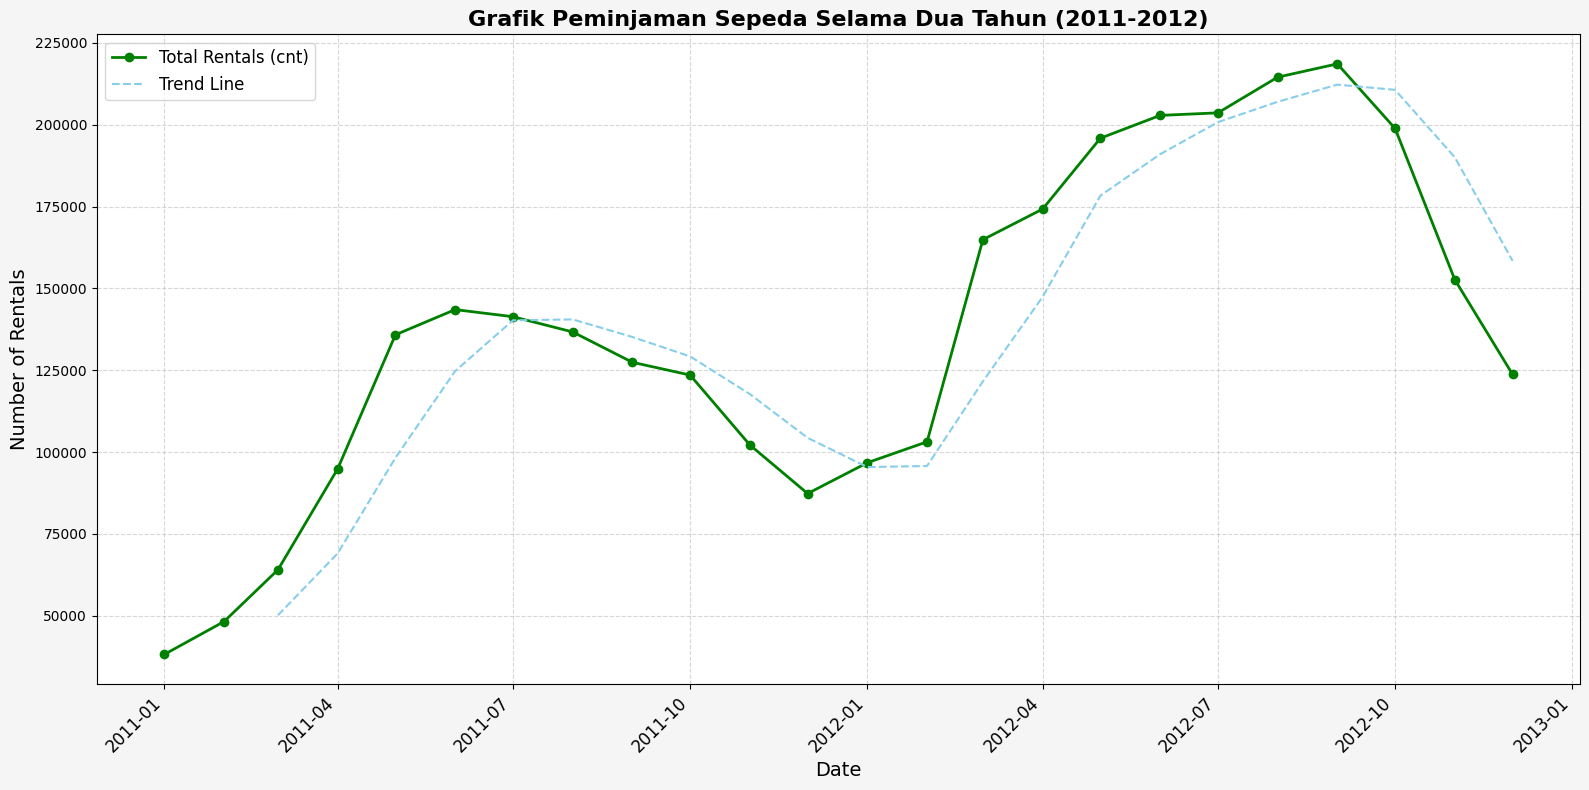

In [48]:
monthly_rentals['date'] = monthly_rentals['yr'] + '-' + monthly_rentals['mnth']
monthly_rentals['date'] = pd.to_datetime(monthly_rentals['date'], format='%Y-%B')
monthly_rentals = monthly_rentals.sort_values('date')

plt.figure(figsize=(16, 8))
plt.plot(monthly_rentals['date'], monthly_rentals['cnt'], marker='o', color='green', linewidth=2, markersize=6, label='Total Rentals (cnt)')
plt.plot(monthly_rentals['date'], monthly_rentals['cnt'].rolling(window=3).mean(), linestyle='--', color='skyblue', label='Trend Line')
plt.title('Grafik Peminjaman Sepeda Selama Dua Tahun (2011-2012)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Rentals', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.gcf().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()


Tren peminjaman sepeda antara tahun 2011 dan 2012 menunjukkan bahwa pada tahun 2011, kuartal pertama mengalami kenaikan yang cukup signifikan, diikuti oleh lonjakan pesat pada kuartal kedua. Namun, pada kuartal ketiga terjadi penurunan yang meskipun tidak terlalu drastis, terus berlanjut hingga kuartal keempat, dengan penurunan yang lebih tajam. Sementara itu, pada tahun 2012, terdapat kenaikan yang sangat signifikan pada akhir kuartal pertama, yang berlanjut hingga kuartal ketiga. Namun, penurunan kembali terjadi pada kuartal keempat. Secara keseluruhan, meskipun ada fluktuasi, peminjaman sepeda mengalami peningkatan yang cukup baik pada kedua tahun tersebut, dengan tren yang lebih positif terlihat pada tahun 2012.

* **Pertanyaan 2 : Musim,cuaca dan waktu seperti apa terjadi pada saat total peminjaman sepeda mencapai puncaknya dalam dua tahun tersebut?**

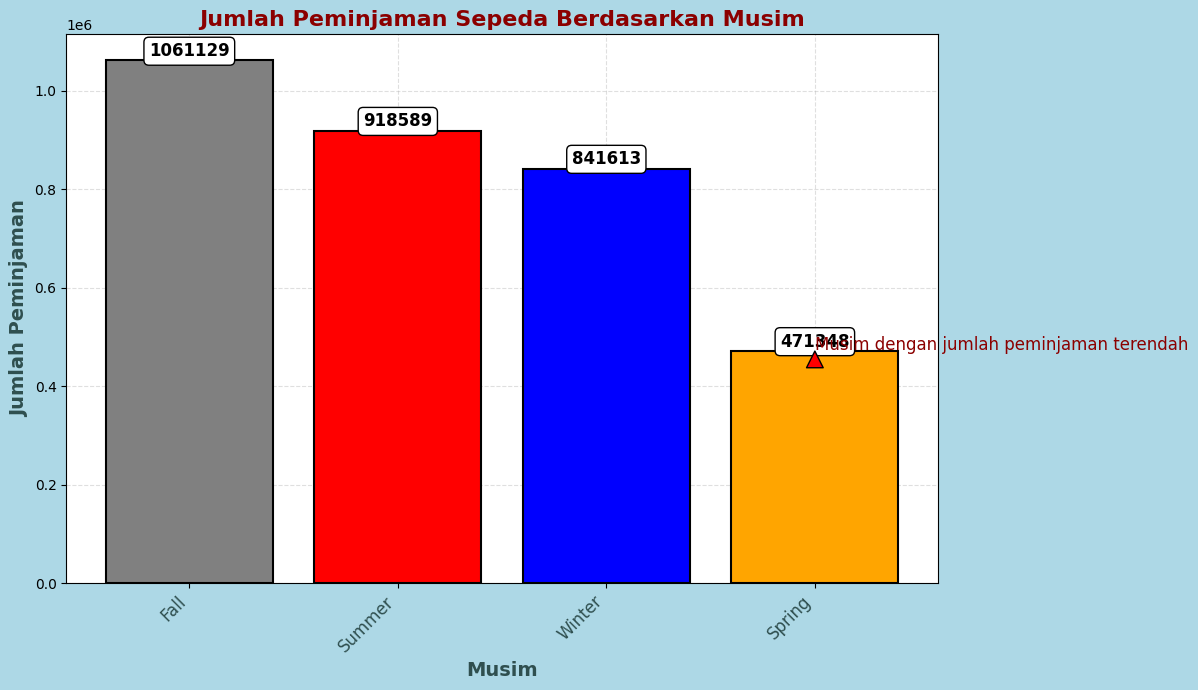

In [70]:

seasonal_counts = main_df.groupby('season').cnt.sum().sort_values(ascending=False)
season_colors = {
    'Winter': 'blue',   
    'Spring': 'orange',  
    'Summer': 'red',  
    'Fall': 'grey'      
}

sizes = seasonal_counts.values
labels = seasonal_counts.index
colors = [season_colors[label] for label in labels]

plt.figure(figsize=(12, 7))
bars = plt.bar(labels, sizes, color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel('Musim', fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel('Jumlah Peminjaman', fontsize=14, fontweight='bold', color='darkslategray')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim', fontsize=16, fontweight='bold', color='darkred')

for i, value in enumerate(sizes):
    plt.text(i, value + 500, str(value), ha='center', va='bottom', fontsize=12, 
             color='black', fontweight='bold', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45, ha='right', fontsize=12, color='darkslategray')
plt.gcf().set_facecolor('lightblue')
for bar in bars:
    bar.set_zorder(2)
plt.annotate('Musim dengan jumlah peminjaman terendah', 
             xy=(3, sizes[3]), xycoords='data', xytext=(3, sizes[3] + 2000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='darkred')
plt.tight_layout()
plt.show()


Grafik di atas menunjukan hasil bahwa musim gugur (fall) dan musim panas (summer) memiliki jumlah peminjam sepeda tertinggi (puncak).

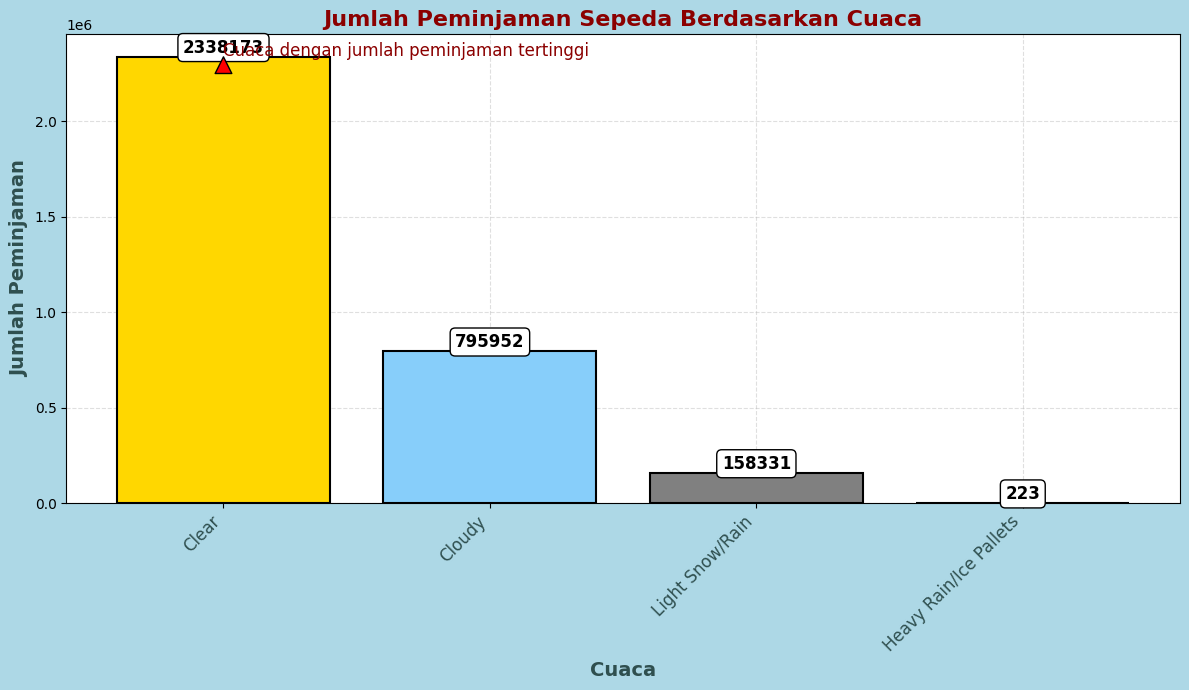

In [78]:
weather_counts = main_df.groupby('weathersit').cnt.sum().sort_values(ascending=False)
weather_colors = {
    'Clear': 'gold', 
    'Cloudy': 'lightskyblue', 
    'Light Snow/Rain': 'grey', 
    'Heavy Rain/Ice Pallets': 'darkblue'
}

sizes = weather_counts.values
labels = weather_counts.index
colors_weather = [weather_colors[label] for label in labels]
plt.figure(figsize=(12, 7))
bars = plt.bar(labels, sizes, color=colors_weather, edgecolor='black', linewidth=1.5)
plt.xlabel('Cuaca', fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel('Jumlah Peminjaman', fontsize=14, fontweight='bold', color='darkslategray')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Cuaca', fontsize=16, fontweight='bold', color='darkred')
for i, value in enumerate(sizes):
    plt.text(i, value + 500, str(value), ha='center', va='bottom', fontsize=12, 
             color='black', fontweight='bold', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45, ha='right', fontsize=12, color='darkslategray')
plt.gcf().set_facecolor('lightblue')  
for bar in bars:
    bar.set_zorder(2)

plt.annotate('Cuaca dengan jumlah peminjaman tertinggi', 
             xy=(0, sizes[0]), xycoords='data', xytext=(0, sizes[0] + 2000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='darkred')
plt.tight_layout()
plt.show()


Grafik di atas menunjukan hasil bahwa cuaca cerah (clear) dan berawan memiliki jumlah peminjam sepeda tertinggi (puncak) terutama pada saat cerah.

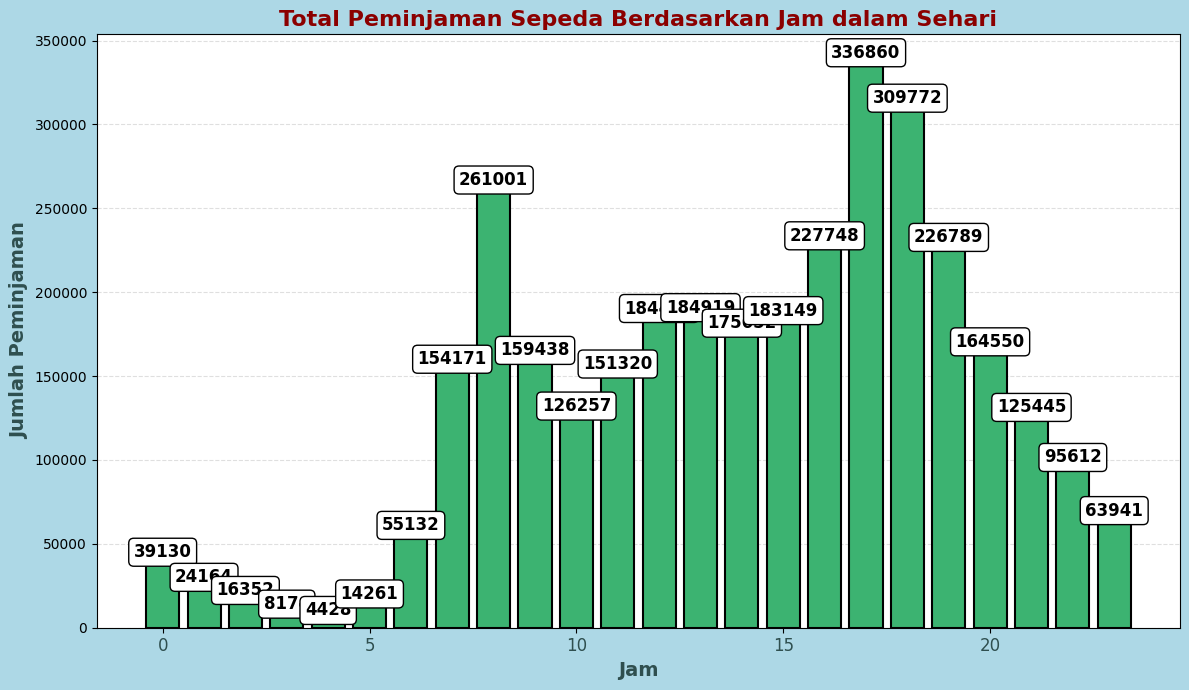

In [73]:
hourly_counts = main_df.groupby('hr')['cnt'].sum()
plt.figure(figsize=(12, 7))
bars = plt.bar(hourly_counts.index, hourly_counts.values, color='mediumseagreen', edgecolor='black', linewidth=1.5)

plt.title('Total Peminjaman Sepeda Berdasarkan Jam dalam Sehari', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Jam', fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel('Jumlah Peminjaman', fontsize=14, fontweight='bold', color='darkslategray')

for i, value in enumerate(hourly_counts.values):
    plt.text(i, value + 500, str(value), ha='center', va='bottom', fontsize=12, 
             color='black', fontweight='bold', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.xticks(rotation=0, fontsize=12, color='darkslategray')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.gcf().set_facecolor('lightblue')  # Latar belakang biru muda
for bar in bars:
    bar.set_zorder(2)
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, dapat dianalisis bahwa pada pukul 5 sore dan 6 sore, terjadi lonjakan signifikan dalam jumlah peminjaman sepeda, dengan masing-masing melebihi 300.000 peminjam. Puncak peminjaman pada jam-jam ini menunjukkan adanya peningkatan permintaan yang tinggi pada periode sore hari, kemungkinan terkait dengan aktivitas harian seperti pulang kerja atau aktivitas luar ruangan lainnya yang memicu kebutuhan transportasi sepeda.

**Clustering Heatmap**

In [74]:
clustering = main_df.groupby(['weekday', 'hr'])['cnt'].sum().unstack()

print(clustering)

hr           0     1     2     3    4     5      6      7      8      9   ...  \
weekday                                                                   ...   
Friday     5453  2571  1325   673  589  2486   9363  26450  48077  26935  ...   
Monday     3571  1800  1021   496  567  2252   8930  25848  42868  22718  ...   
Saturday   9902  7117  5302  2403  804   854   2205   4826  12020  19613  ...   
Sunday     9775  8053  6286  3239  955   852   1493   3476   8805  16437  ...   
Thursday   4045  1774   934   497  528  2669  11066  31388  50323  24810  ...   
Tuesday    2790  1254   687   382  508  2470  10863  30569  48122  24118  ...   
Wednesday  3594  1595   797   484  477  2678  11212  31614  50786  24807  ...   

hr            14     15     16     17     18     19     20     21     22  \
weekday                                                                    
Friday     23854  26256  34423  51211  43783  31415  22186  17667  15295   
Monday     20041  21046  29583  52249  500

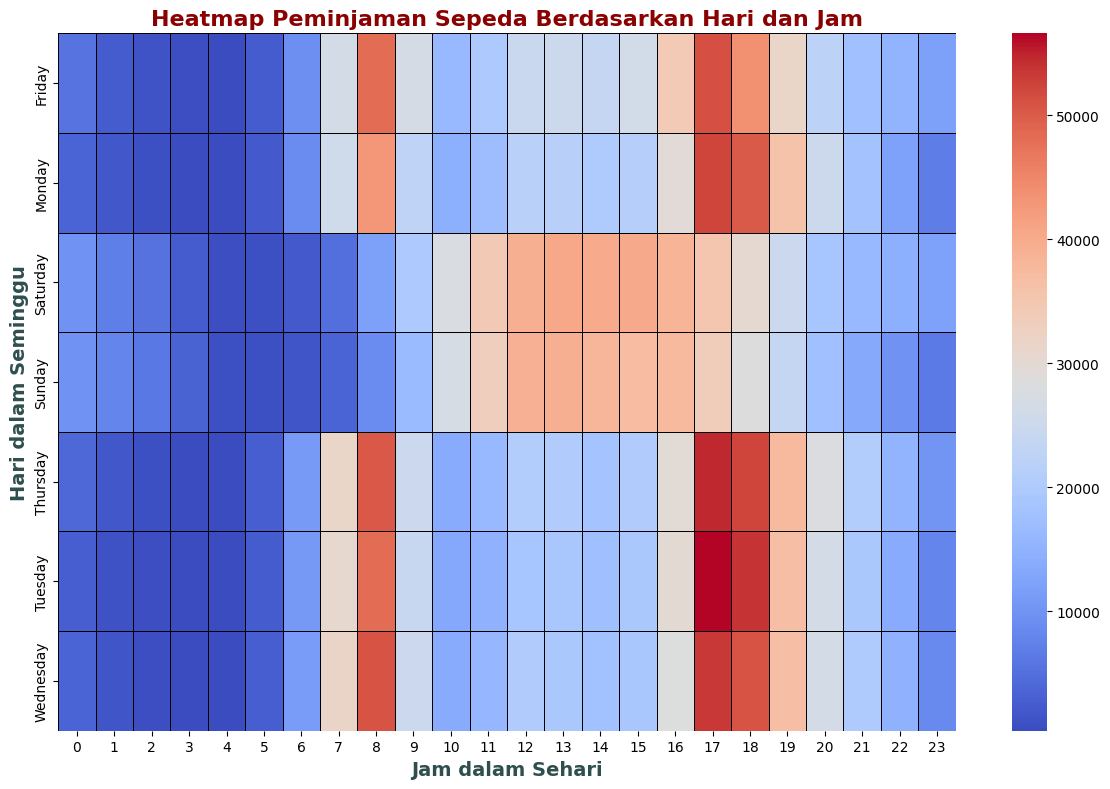

In [76]:
plt.figure(figsize=(12, 8))
sns.heatmap(clustering, cmap="coolwarm", annot=False, linewidths=0.5, linecolor='black')
plt.title('Heatmap Peminjaman Sepeda Berdasarkan Hari dan Jam', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Jam dalam Sehari', fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel('Hari dalam Seminggu', fontsize=14, fontweight='bold', color='darkslategray')
plt.tight_layout()
plt.show()



Berdasarkan hasil **clustering** yang ditampilkan pada heatmap, dapat disimpulkan bahwa tren peminjaman sepeda menunjukkan peningkatan signifikan pada pukul 8 pagi, 5 sore, dan 6 sore di hari Senin hingga Jumat. Sementara itu, pada hari Sabtu dan Minggu, peminjaman sepeda cenderung meningkat pada siang hari, antara pukul 12 siang hingga 3 sore. Dalam analisis ini, clustering digunakan untuk mengelompokkan data berdasarkan dua fitur utama, yaitu 'hr' (jam) dan 'weekday' (hari dalam seminggu), yang kemudian dihitung total peminjaman ('cnt') untuk setiap kombinasi hari dan jam. Tujuan dari metode ini adalah untuk mengidentifikasi pola dan tren dalam data peminjaman sepeda, yang divisualisasikan dalam bentuk heatmap untuk memberikan gambaran yang lebih jelas tentang perilaku peminjam sepanjang minggu.

## Kesimpulan

Berdasarkan hasil analisis tren peminjaman sepeda menggunakan **Bike Sharing Dataset** antara tahun 2011 dan 2012, dapat disimpulkan beberapa hal penting:

1. **Tren Peminjaman Sepeda (2011-2012)**:
   - **Tahun 2011**: Peminjaman sepeda mengalami kenaikan signifikan pada kuartal pertama dan lonjakan pesat pada kuartal kedua. Namun, kuartal ketiga menunjukkan penurunan yang meskipun tidak drastis, terus berlanjut hingga kuartal keempat, dengan penurunan yang lebih tajam.
   - **Tahun 2012**: Pada akhir kuartal pertama, terdapat kenaikan sangat signifikan yang berlanjut hingga kuartal ketiga. Penurunan kembali terjadi pada kuartal keempat. Meskipun ada fluktuasi, secara keseluruhan peminjaman sepeda menunjukkan tren yang lebih positif pada tahun 2012.

2. **Musim dan Cuaca**:
   - **Musim**: Peminjaman sepeda tertinggi terjadi pada musim gugur (fall) dan musim panas (summer).
   - **Cuaca**: Puncak peminjaman sepeda terjadi saat cuaca cerah (clear) dan berawan, terutama saat cuaca cerah.

3. **Waktu Peminjaman**:
   - **Puncak Peminjaman**: Puncak peminjaman sepeda terjadi pada pukul 5 sore dan 6 sore, dengan masing-masing melebihi 300.000 peminjam. Peningkatan ini kemungkinan terkait dengan aktivitas harian seperti pulang kerja atau kegiatan luar ruangan.
   
4. **Clustering Berdasarkan Jam dan Hari**:
   - **Senin hingga Jumat**: Pemimpin sepeda meningkat signifikan pada pukul 8 pagi, 5 sore, dan 6 sore.
   - **Sabtu dan Minggu**: Peminjaman sepeda cenderung meningkat pada siang hari antara pukul 12 siang hingga 3 sore.

Secara keseluruhan, analisis ini menunjukkan pola peminjaman sepeda yang dapat dipengaruhi oleh berbagai faktor seperti waktu, cuaca, dan hari dalam seminggu. Visualisasi clustering melalui heatmap juga membantu untuk memberikan gambaran yang lebih jelas tentang tren dan perilaku peminjam sepeda.

In [82]:
all_df = main_df.copy()  
all_df.to_csv("all_data.csv", index=False)
